Adınız: Alperen Akyıldız      
Okul Numaranız: 2312721060  
GitHub Repo Bağlantısı: https://github.com/AlpAkyildiz/genetik_optimizasyonu

# Problemin Tanımı
Bu proje, bir lojistik firmasının akıllı deposunda kullanılacak rafların yüksekliği ve derinliğinin en uygun şekilde belirlenmesini amaçlamaktadır. Raf ölçüleri, depolama kapasitesini ve operasyonel verimi doğrudan etkilediği için firma bu değerleri optimize etmek istemektedir.

Optimizasyon problemi iki değişkenden oluşur:

x₁: Raf yüksekliği (m)

x₂: Raf derinliği (m)

   Depo verim puanı aşağıdaki amaç fonksiyonu ile ifade edilir:

   y=4x_1​+3x_2​−0.5x_1​x_2​


   Amaç fonksiyonunun doğrusal olmaması ve kısıtların esnek yapısı nedeniyle, problem Genetik Algoritma ile çözülmüştür. Genetik Algoritma, uygun çözümleri nesiller boyunca geliştirerek raf ölçüleri için en yüksek verim puanını sağlayan optimum değerleri bulmayı hedeflemiştir.

# Gerekli Kütüphaneler & Parametreler

Bu bölümde Genetik Algoritma için gerekli Python kütüphaneleri yüklenir ve GA parametreleri tanımlanır.
Parametreler; popülasyon boyutu, nesil sayısı, mutasyon–çaprazlama oranları ve değişken sınırlarını içerir.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# GA Parametreleri
POP_SIZE = 50
GENS = 80
MUT_RATE = 0.1
CROSS_RATE = 0.8

# Değişken sınırları
X1_MIN, X1_MAX = 2, 6
X2_MIN, X2_MAX = 1, 4


# Amaç Fonksiyonu


Bu fonksiyon, problemin optimize edilmek istenen matematiksel modelidir.
Amaç: depo verim puanını maksimize etmek.

In [2]:
def objective(x1, x2):
    return 4*x1 + 3*x2 - 0.5*x1*x2


# Kısıt Fonksiyonları


Bu fonksiyon, verilen çözümün kısıtlara uyup uymadığını kontrol eder.

x1 + x2 ≤ 8

x2 ≥ 1.5

Kısıt ihlal edilirse çözüm geçersiz sayılır.

In [3]:
def check_constraints(x1, x2):
    if x1 + x2 > 8:
        return False
    if x2 < 1.5:
        return False
    return True


# Fitness Fonksiyonu


Fitness, bireyin ne kadar iyi olduğunu ölçer.

Kısıt ihlali varsa fitness = 0

Fonksiyon negatifse fitness = 0

Amaç fonksiyonunun pozitif hali fitness olarak alınır

GA’nın tüm seçme/çaprazlama/mutasyon adımları fitness üzerinden yapılır.

In [4]:
def fitness(x1, x2):
    if not check_constraints(x1, x2):
        return 0
    value = objective(x1, x2)
    return max(value, 0)


# Başlangıç Popülasyonu Oluşturma


Rasgele bireyler oluşturulur. Her birey: [x1, x2] şeklindedir.

In [5]:
def create_individual():
    x1 = random.uniform(X1_MIN, X1_MAX)
    x2 = random.uniform(X2_MIN, X2_MAX)
    return [x1, x2]

def create_population():
    return [create_individual() for _ in range(POP_SIZE)]


# Seçim Operatörü (Tournament Selection)


İki rastgele birey karşılaştırılır, fitness'ı yüksek olan ebeveyn olarak seçilir.

In [6]:
def selection(population):
    a = random.choice(population)
    b = random.choice(population)

    if fitness(a[0], a[1]) > fitness(b[0], b[1]):
        return a
    else:
        return b


# Çaprazlama Operatörü


İki ebeveyn arasında ara değerleme (interpolation crossover) uygulanır.
Çaprazlama olasılığının altına düşerse yeni çocuklar üretilir.

In [7]:
def crossover(parent1, parent2):
    if random.random() > CROSS_RATE:
        return parent1.copy(), parent2.copy()

    alpha = random.random()

    child1 = [
        alpha*parent1[0] + (1-alpha)*parent2[0],
        alpha*parent1[1] + (1-alpha)*parent2[1]
    ]
    child2 = [
        alpha*parent2[0] + (1-alpha)*parent1[0],
        alpha*parent2[1] + (1-alpha)*parent1[1]
    ]

    return child1, child2


# Mutasyon Operatörü


Bireyin genlerinde küçük rastgele değişiklikler yapılır.
Değişkenler aralık dışına çıkarsa yeniden sınırlar içine alınır.

In [8]:
def mutate(individual):
    if random.random() < MUT_RATE:
        individual[0] += np.random.uniform(-0.3, 0.3)
    if random.random() < MUT_RATE:
        individual[1] += np.random.uniform(-0.3, 0.3)

    individual[0] = np.clip(individual[0], X1_MIN, X1_MAX)
    individual[1] = np.clip(individual[1], X2_MIN, X2_MAX)

    return individual


# Bir Nesil Oluşturma


Bu adımda seçim, çaprazlama ve mutasyon işlemleri bir araya gelir.
Yeni nesil tamamen bu üç işlemle oluşturulur.

In [9]:
def evolve_population(pop):
    new_pop = []
    while len(new_pop) < POP_SIZE:
        p1 = selection(pop)
        p2 = selection(pop)

        c1, c2 = crossover(p1, p2)
        c1 = mutate(c1)
        c2 = mutate(c2)

        new_pop.append(c1)
        new_pop.append(c2)

    return new_pop[:POP_SIZE]


# GA Ana Döngü


Her nesilde popülasyon geliştirilir, en iyi bireyin fitness değeri saklanır.

In [10]:
population = create_population()
best_history = []

for gen in range(GENS):
    population = evolve_population(population)

    best = max(population, key=lambda ind: fitness(ind[0], ind[1]))
    best_history.append(fitness(best[0], best[1]))

    print(f"Gen {gen+1}: En iyi = {fitness(best[0], best[1]):.2f}")


Gen 1: En iyi = 22.91
Gen 2: En iyi = 22.52
Gen 3: En iyi = 23.32
Gen 4: En iyi = 23.71
Gen 5: En iyi = 23.30
Gen 6: En iyi = 23.30
Gen 7: En iyi = 23.07
Gen 8: En iyi = 23.72
Gen 9: En iyi = 23.70
Gen 10: En iyi = 23.60
Gen 11: En iyi = 23.74
Gen 12: En iyi = 23.76
Gen 13: En iyi = 23.76
Gen 14: En iyi = 23.75
Gen 15: En iyi = 23.84
Gen 16: En iyi = 23.84
Gen 17: En iyi = 23.84
Gen 18: En iyi = 23.78
Gen 19: En iyi = 24.00
Gen 20: En iyi = 24.00
Gen 21: En iyi = 24.00
Gen 22: En iyi = 24.00
Gen 23: En iyi = 24.00
Gen 24: En iyi = 24.00
Gen 25: En iyi = 24.00
Gen 26: En iyi = 24.00
Gen 27: En iyi = 24.00
Gen 28: En iyi = 24.00
Gen 29: En iyi = 24.00
Gen 30: En iyi = 24.00
Gen 31: En iyi = 24.00
Gen 32: En iyi = 24.00
Gen 33: En iyi = 24.00
Gen 34: En iyi = 24.00
Gen 35: En iyi = 24.00
Gen 36: En iyi = 24.00
Gen 37: En iyi = 24.00
Gen 38: En iyi = 24.00
Gen 39: En iyi = 24.00
Gen 40: En iyi = 24.00
Gen 41: En iyi = 24.00
Gen 42: En iyi = 24.00
Gen 43: En iyi = 24.00
Gen 44: En iyi = 24.

# Sonuçların Yazdırılması


GA sonunda bulunan en iyi raf yüksekliği, derinliği ve verim puanı burada gösterilir.

In [11]:
best = max(population, key=lambda ind: fitness(ind[0], ind[1]))

print("\n📌 EN İYİ ÇÖZÜM")
print(f"x1 (yükseklik) = {best[0]:.4f} m")
print(f"x2 (derinlik)  = {best[1]:.4f} m")
print(f"y = {fitness(best[0], best[1]):.4f}")



📌 EN İYİ ÇÖZÜM
x1 (yükseklik) = 6.0000 m
x2 (derinlik)  = 1.7009 m
y = 24.0000


# Fitness Grafiği


Nesiller boyunca en iyi fitness değerinin nasıl geliştiğini gösterir.

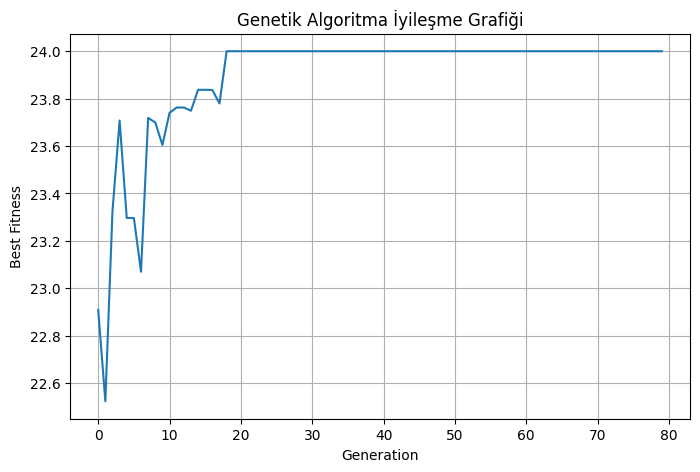

In [12]:
plt.figure(figsize=(8,5))
plt.plot(best_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Genetik Algoritma İyileşme Grafiği")
plt.grid()
plt.show()
